In [12]:
import numpy as np,pandas as pd
import matplotlib as plt
import sklearn
from sklearn.model_selection import train_test_split


In [36]:
#!pip install six

#!pip install graphviz

#conda install graphviz
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
def evaluate_model(decision_tree,x_train_inp,x_test_inp,y_train_inp,y_test_inp):
    
    y_train_pred = decision_tree.predict(x_train_inp)
    y_test_pred = decision_tree.predict(x_test_inp)
    
    print("Train set evaluation")
    r2_score_train=r2_score(y_pred=y_train_pred,y_true=y_train_inp)
    accuracy_score_train = accuracy_score(y_pred=y_train_pred,y_true=y_train_inp)
    confusion_matrix_train = confusion_matrix(y_pred=y_train_pred,y_true=y_train_inp)
    print("r2_score_train  ",r2_score_train)
    print("accuracy_score_train ",accuracy_score_train)
    print("confusion_matrix_train ",confusion_matrix_train)
    
    print("+++++++++++"*6)
    
    print("Test set evaluation")
    r2_score_test=r2_score(y_pred=y_test_pred,y_true=y_test_inp)
    accuracy_score_test = accuracy_score(y_pred=y_test_pred,y_true=y_test_inp)
    confusion_matrix_test = confusion_matrix(y_pred=y_test_pred,y_true=y_test_inp)
    print("r2_score_test ",r2_score_test)
    print("accuracy_score_test ",accuracy_score_test)
    print("confusion_matrix_test ",confusion_matrix_test)



In [27]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(decision_tree,columns):
    dot_data = StringIO()  

    export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=columns, 
                class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    


In [15]:
data = pd.read_csv("../heart_v2.csv")
data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [17]:
y = data.pop("heart disease")
x = data

#### model preparation

In [28]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=12)
print(X_train.shape ,X_test.shape)

(189, 4) (81, 4)


In [29]:
from sklearn.tree import DecisionTreeClassifier



### creating decison tree without any parameters

In [38]:
dt_default_values = DecisionTreeClassifier(random_state=1)
dt_default_values.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

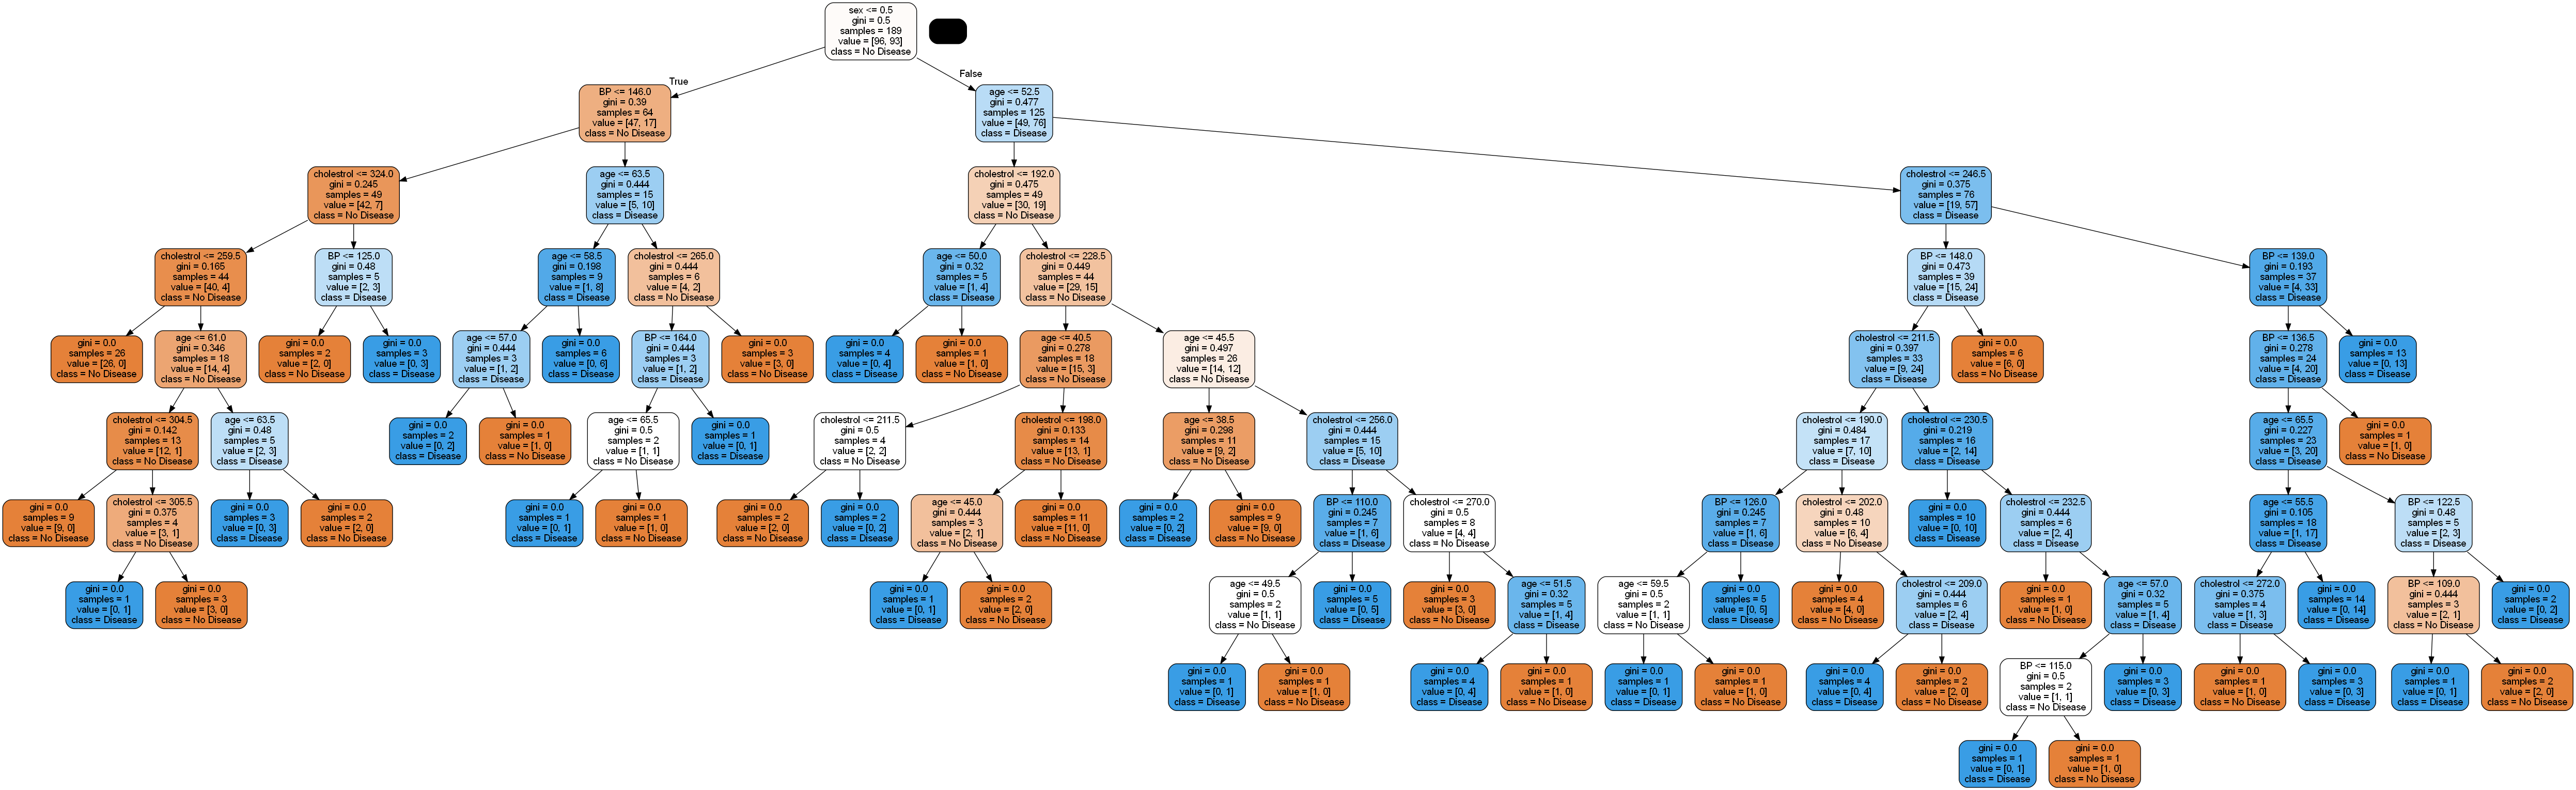

In [39]:
graph = get_dt_graph(dt_default_values,x.columns)
Image(graph.create_png())

In [41]:
evaluate_model(dt_default_values,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   1.0
accuracy_score_train  1.0
confusion_matrix_train  [[96  0]
 [ 0 93]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -0.7777777777777775
accuracy_score_test  0.6049382716049383
confusion_matrix_test  [[33 21]
 [11 16]]


In [43]:
### we can see that overfiting in the model as tree is very deep and also training accuracy is
### high but testting accuracy is low

### Creating Decision tree with  min_samples_split=20

In [47]:
dt_min_sample_split = DecisionTreeClassifier(min_samples_split=20,random_state=1)
dt_min_sample_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20)

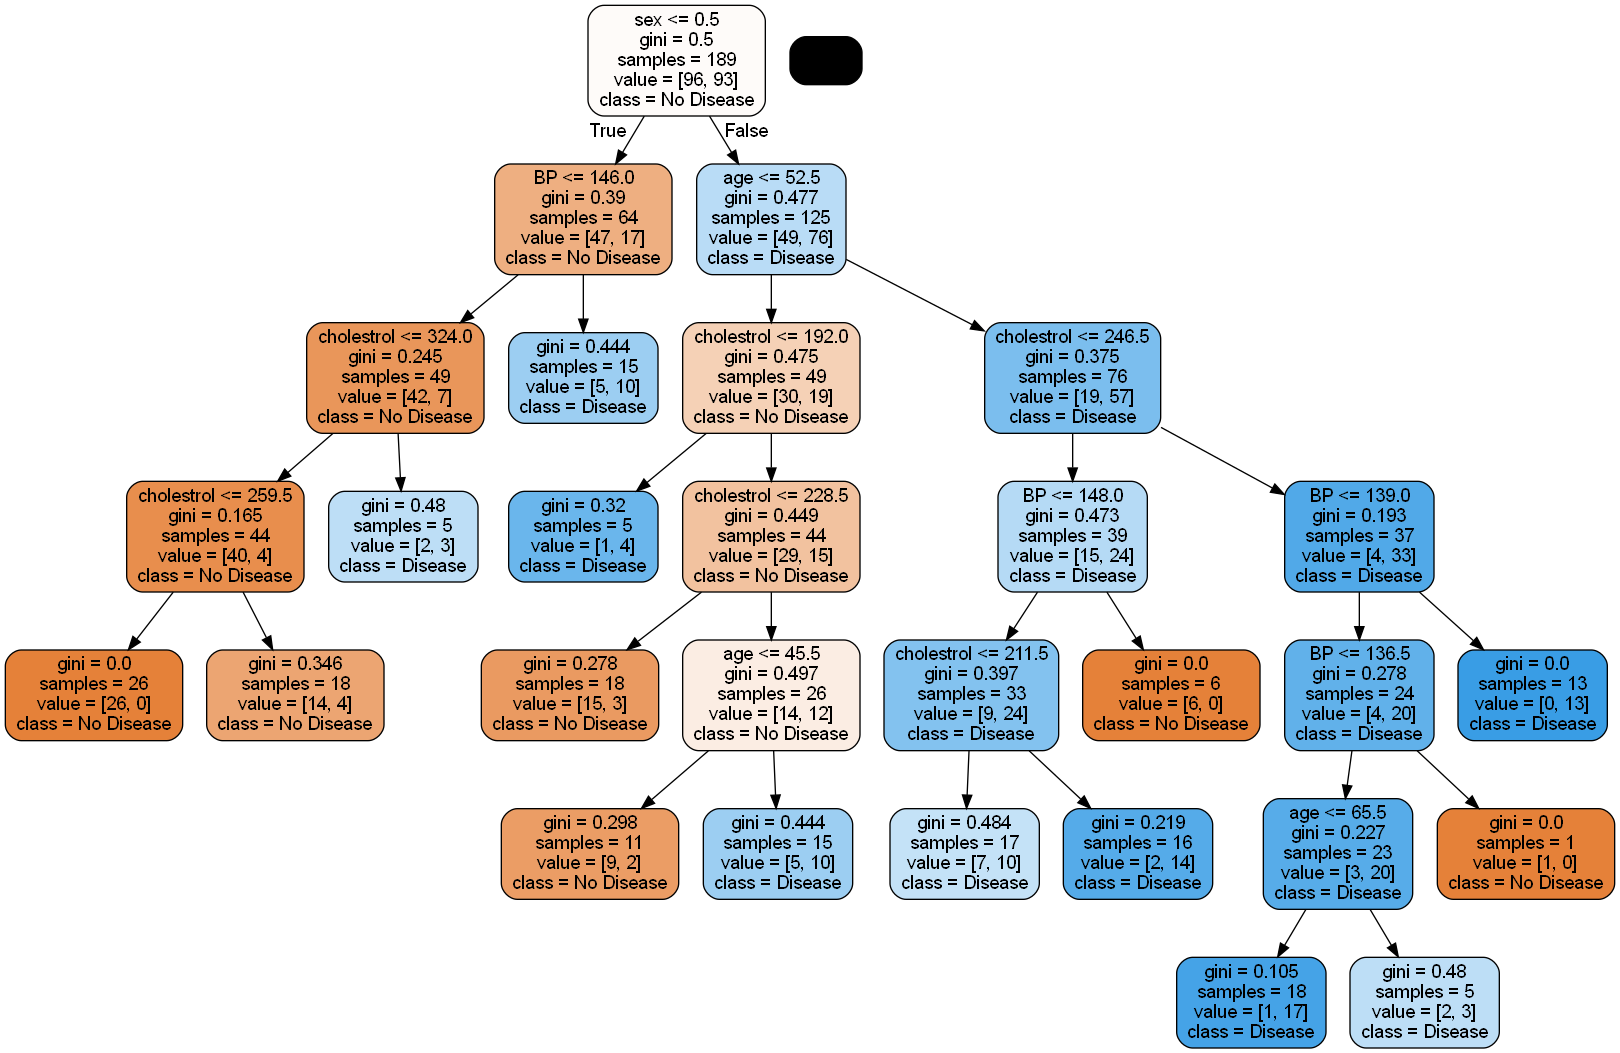

In [48]:
### checking graph

graph = get_dt_graph(dt_min_sample_split,x.columns)
Image(graph.create_png())

In [50]:
#### here we see better result in comparision with decision tree built using default parameter but again we see
#### some leafs with less variable like 6 smaple data and using it it predicts some values which might leads to overfitting
#### hence we will see to truncate teh tree using min_sample_leaf

In [51]:
evaluate_model(dt_min_sample_split,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   0.28024193548387066
accuracy_score_train  0.8201058201058201
confusion_matrix_train  [[71 25]
 [ 9 84]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -1.166666666666666
accuracy_score_test  0.5185185185185185
confusion_matrix_test  [[26 28]
 [11 16]]


### Creating Decision tree with  min_samples_leaf=12

In [52]:
dt_min_sample_leaf = DecisionTreeClassifier(min_samples_leaf=12,random_state=1)
dt_min_sample_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=12)

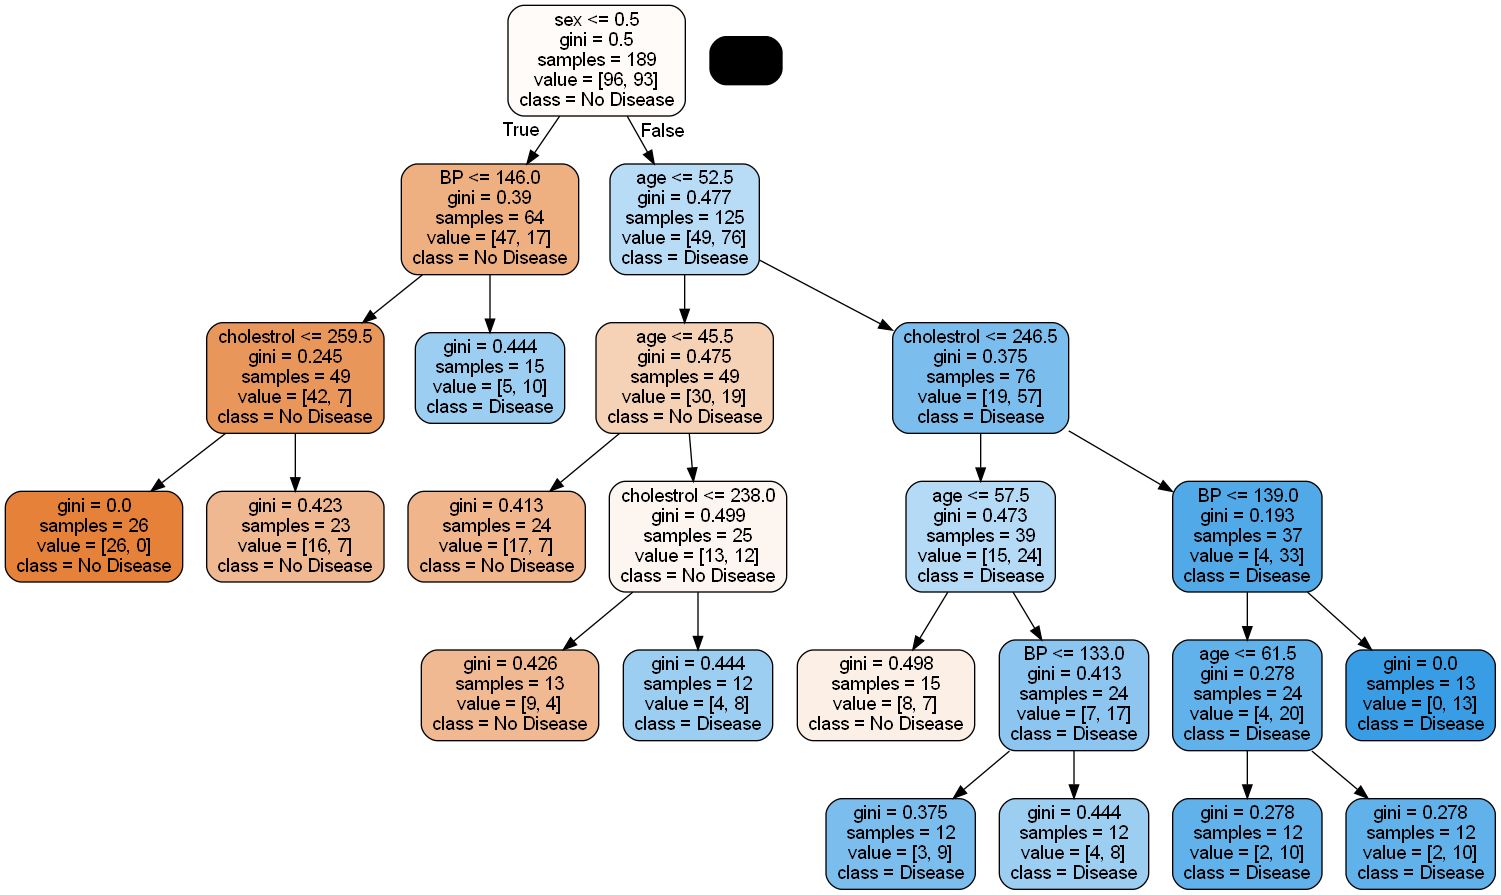

In [53]:
### checking graph

graph = get_dt_graph(dt_min_sample_leaf,x.columns)
Image(graph.create_png())


In [54]:
evaluate_model(dt_min_sample_leaf,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   0.04737903225806417
accuracy_score_train  0.7619047619047619
confusion_matrix_train  [[76 20]
 [25 68]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -0.7777777777777775
accuracy_score_test  0.6049382716049383
confusion_matrix_test  [[34 20]
 [12 15]]


### creating decison tree with max height as 3

In [58]:
dt_max_depth = DecisionTreeClassifier(max_depth=3,random_state=1)
dt_max_depth.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=3, random_state=1)

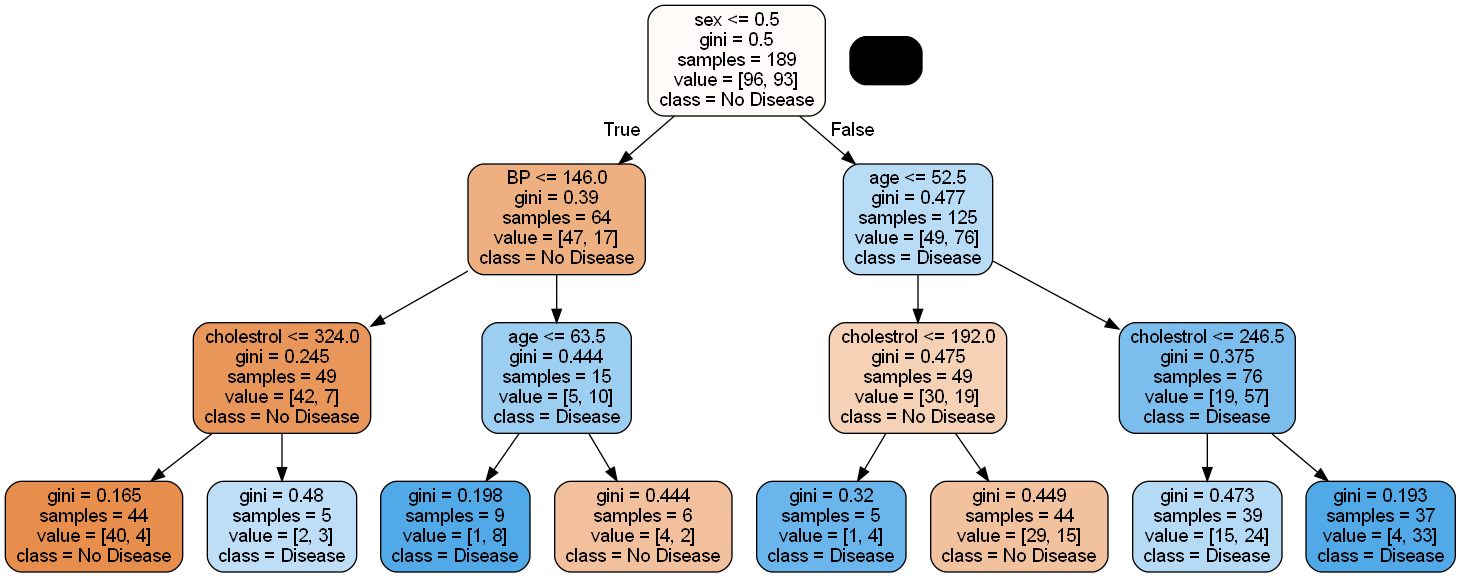

In [59]:
### checking graph

graph = get_dt_graph(dt_max_depth,x.columns)
Image(graph.create_png())


In [60]:
evaluate_model(dt_max_depth,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   0.0685483870967738
accuracy_score_train  0.7671957671957672
confusion_matrix_train  [[73 23]
 [21 72]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -1.0555555555555554
accuracy_score_test  0.5432098765432098
confusion_matrix_test  [[30 24]
 [13 14]]


#### All above techniques of truncating is by default using Gini criterian ,we will see the model using entropy ,,,out put will be same

In [61]:
dt_entropy = DecisionTreeClassifier(max_depth=3,random_state=1,criterion='entropy')
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

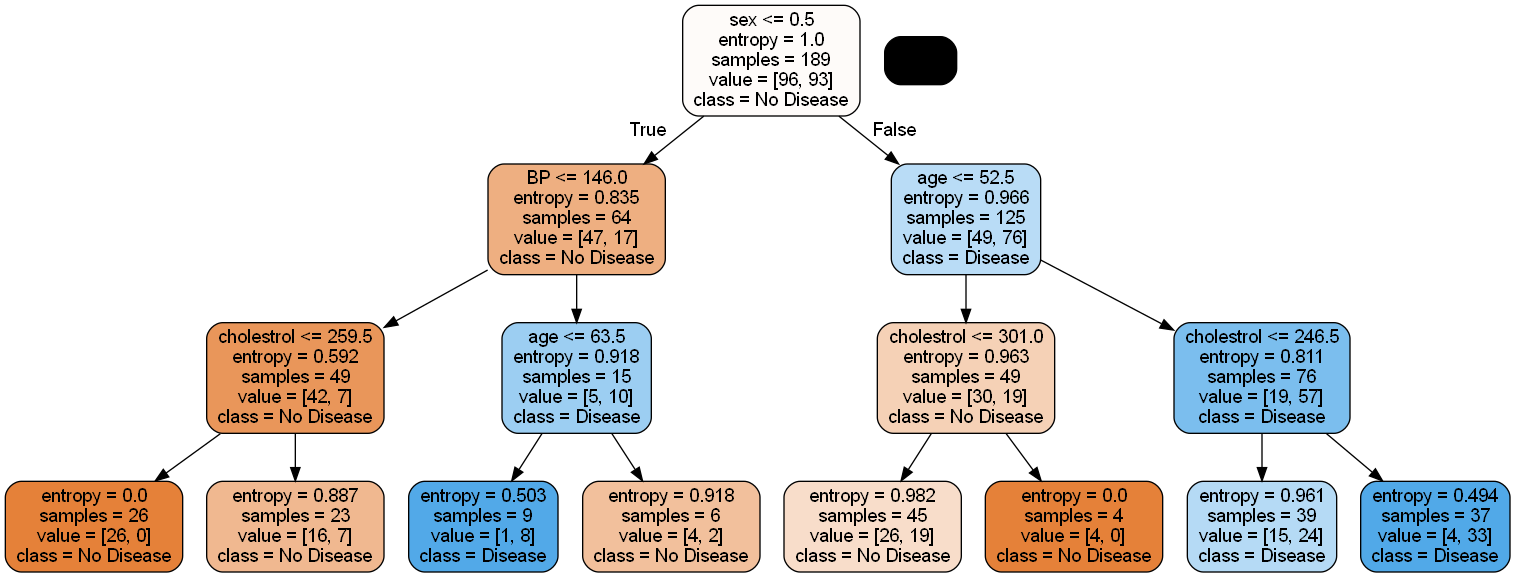

In [65]:
graph = get_dt_graph(dt_entropy,x.columns)
Image(graph.create_png())

In [66]:
evaluate_model(dt_entropy,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   -0.016129032258064946
accuracy_score_train  0.746031746031746
confusion_matrix_train  [[76 20]
 [28 65]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -0.7777777777777775
accuracy_score_test  0.6049382716049383
confusion_matrix_test  [[36 18]
 [14 13]]


In [67]:
#### Hyper tuning using Grid Search CV K folds

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
help(DecisionTreeClassifier())

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

In [71]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [74]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [70]:
params ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth' :[3,5,7,9,10] ,
    'min_samples_split':[10,20,30,40,50], 
    'min_samples_leaf':[23,14,24,8,19]
}

In [75]:
default_dt = DecisionTreeClassifier(random_state=12)
grid = GridSearchCV(estimator=default_dt,
                   param_grid=params,
                   scoring="accuracy",
                   cv=5,
                   verbose=1,
                   return_train_score =True
                   )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [23, 14, 24, 8, 19],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [76]:
grid.best_score_

0.7142247510668562

In [78]:
best_decision_tree_from_gridsearchcv=grid.best_estimator_

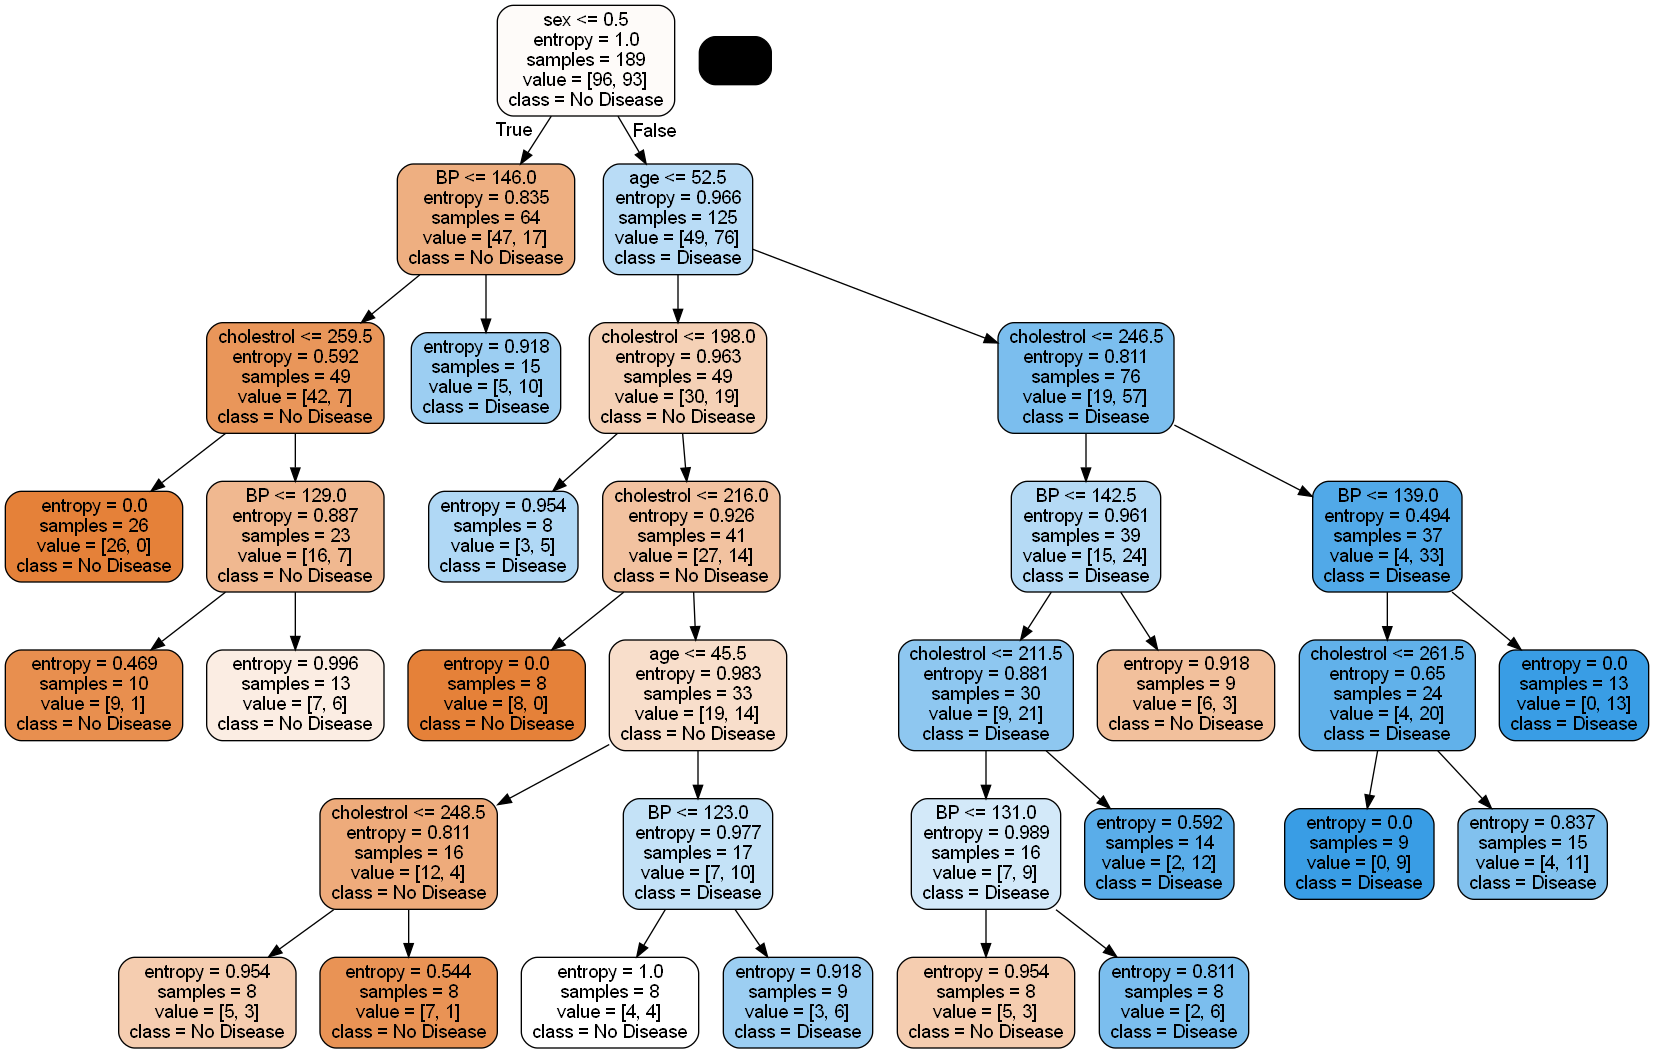

In [79]:
graph = get_dt_graph(best_decision_tree_from_gridsearchcv,x.columns)
Image(graph.create_png())

In [80]:
evaluate_model(best_decision_tree_from_gridsearchcv,X_train,X_test,y_train,y_test)

Train set evaluation
r2_score_train   0.15322580645161255
accuracy_score_train  0.7883597883597884
confusion_matrix_train  [[77 19]
 [21 72]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  -0.833333333333333
accuracy_score_test  0.5925925925925926
confusion_matrix_test  [[31 23]
 [10 17]]
